In [188]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


corrientes = pd.read_csv('corrientes.csv')
potencias = pd.read_csv('potencias.csv')

corrientes['timestamp'] = pd.to_datetime(corrientes['timestamp'])
potencias['timestamp'] = pd.to_datetime(potencias['timestamp'])

# Unir los dataframes en base al ID y timestamp
merged_df = pd.merge(corrientes, potencias, on=['id', 'timestamp'])

# Separar la columna de timestamp en año, mes, día, hora, minuto
merged_df['año'] = merged_df['timestamp'].dt.year
merged_df['mes'] = merged_df['timestamp'].dt.month
merged_df['dia'] = merged_df['timestamp'].dt.day
merged_df['hora'] = merged_df['timestamp'].dt.hour
merged_df['minuto'] = merged_df['timestamp'].dt.minute

# Seleccionar y reorganizar las columnas en el formato deseado
final_df = merged_df[['año', 'mes', 'dia', 'hora', 'minuto', 'activa', 'reactiva', 'aparente', 'l1', 'l2', 'l3']]

# Mostrar el dataframe resultante
print(final_df)

         año  mes  dia  hora  minuto  activa  reactiva  aparente     l1  \
0       2021    1    1     0       0  13.584     9.264    16.444  29.16   
1       2021    1    1     0      15  12.492     9.840    15.904  27.30   
2       2021    1    1     0      30  12.468    10.056    16.016  27.12   
3       2021    1    1     0      45  13.032     9.060    15.872  27.18   
4       2021    1    1     1       0  12.540     9.720    15.868  27.12   
...      ...  ...  ...   ...     ...     ...       ...       ...    ...   
117200  2024    5    6     8      45  45.840     3.564    45.980  74.16   
117201  2024    5    6     9       0  52.092     3.084    52.184  77.97   
117202  2024    5    6     9      15  51.996     2.448    52.052  74.55   
117203  2024    5    6     9      30  53.472     2.316    53.524  77.43   
117204  2024    5    6     9      45  59.472     2.280    59.516  82.71   

            l2     l3  
0        25.62  20.85  
1        24.81  20.34  
2        25.56  20.64  
3  

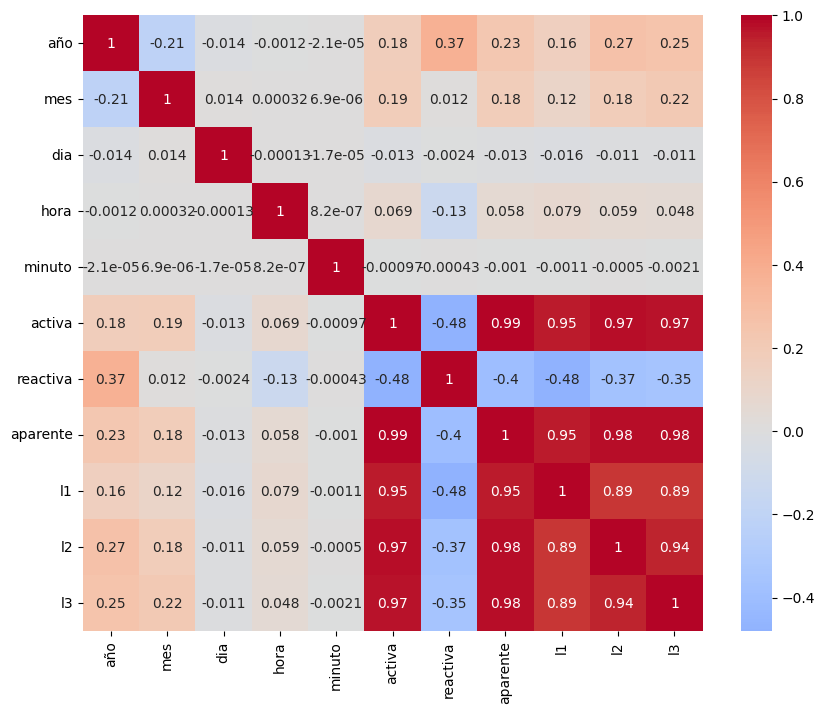

año         0.175960
mes         0.187779
dia        -0.012915
hora        0.068827
minuto     -0.000972
activa      1.000000
reactiva   -0.481186
aparente    0.994164
l1          0.950231
l2          0.972447
l3          0.968129
Name: activa, dtype: float64


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = final_df.corr()

# Generar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)

# Mostrar el mapa de calor
plt.show()

# Mostrar las correlaciones con la potencia activa
print(corr_matrix['activa'])

<function matplotlib.pyplot.show(close=None, block=None)>

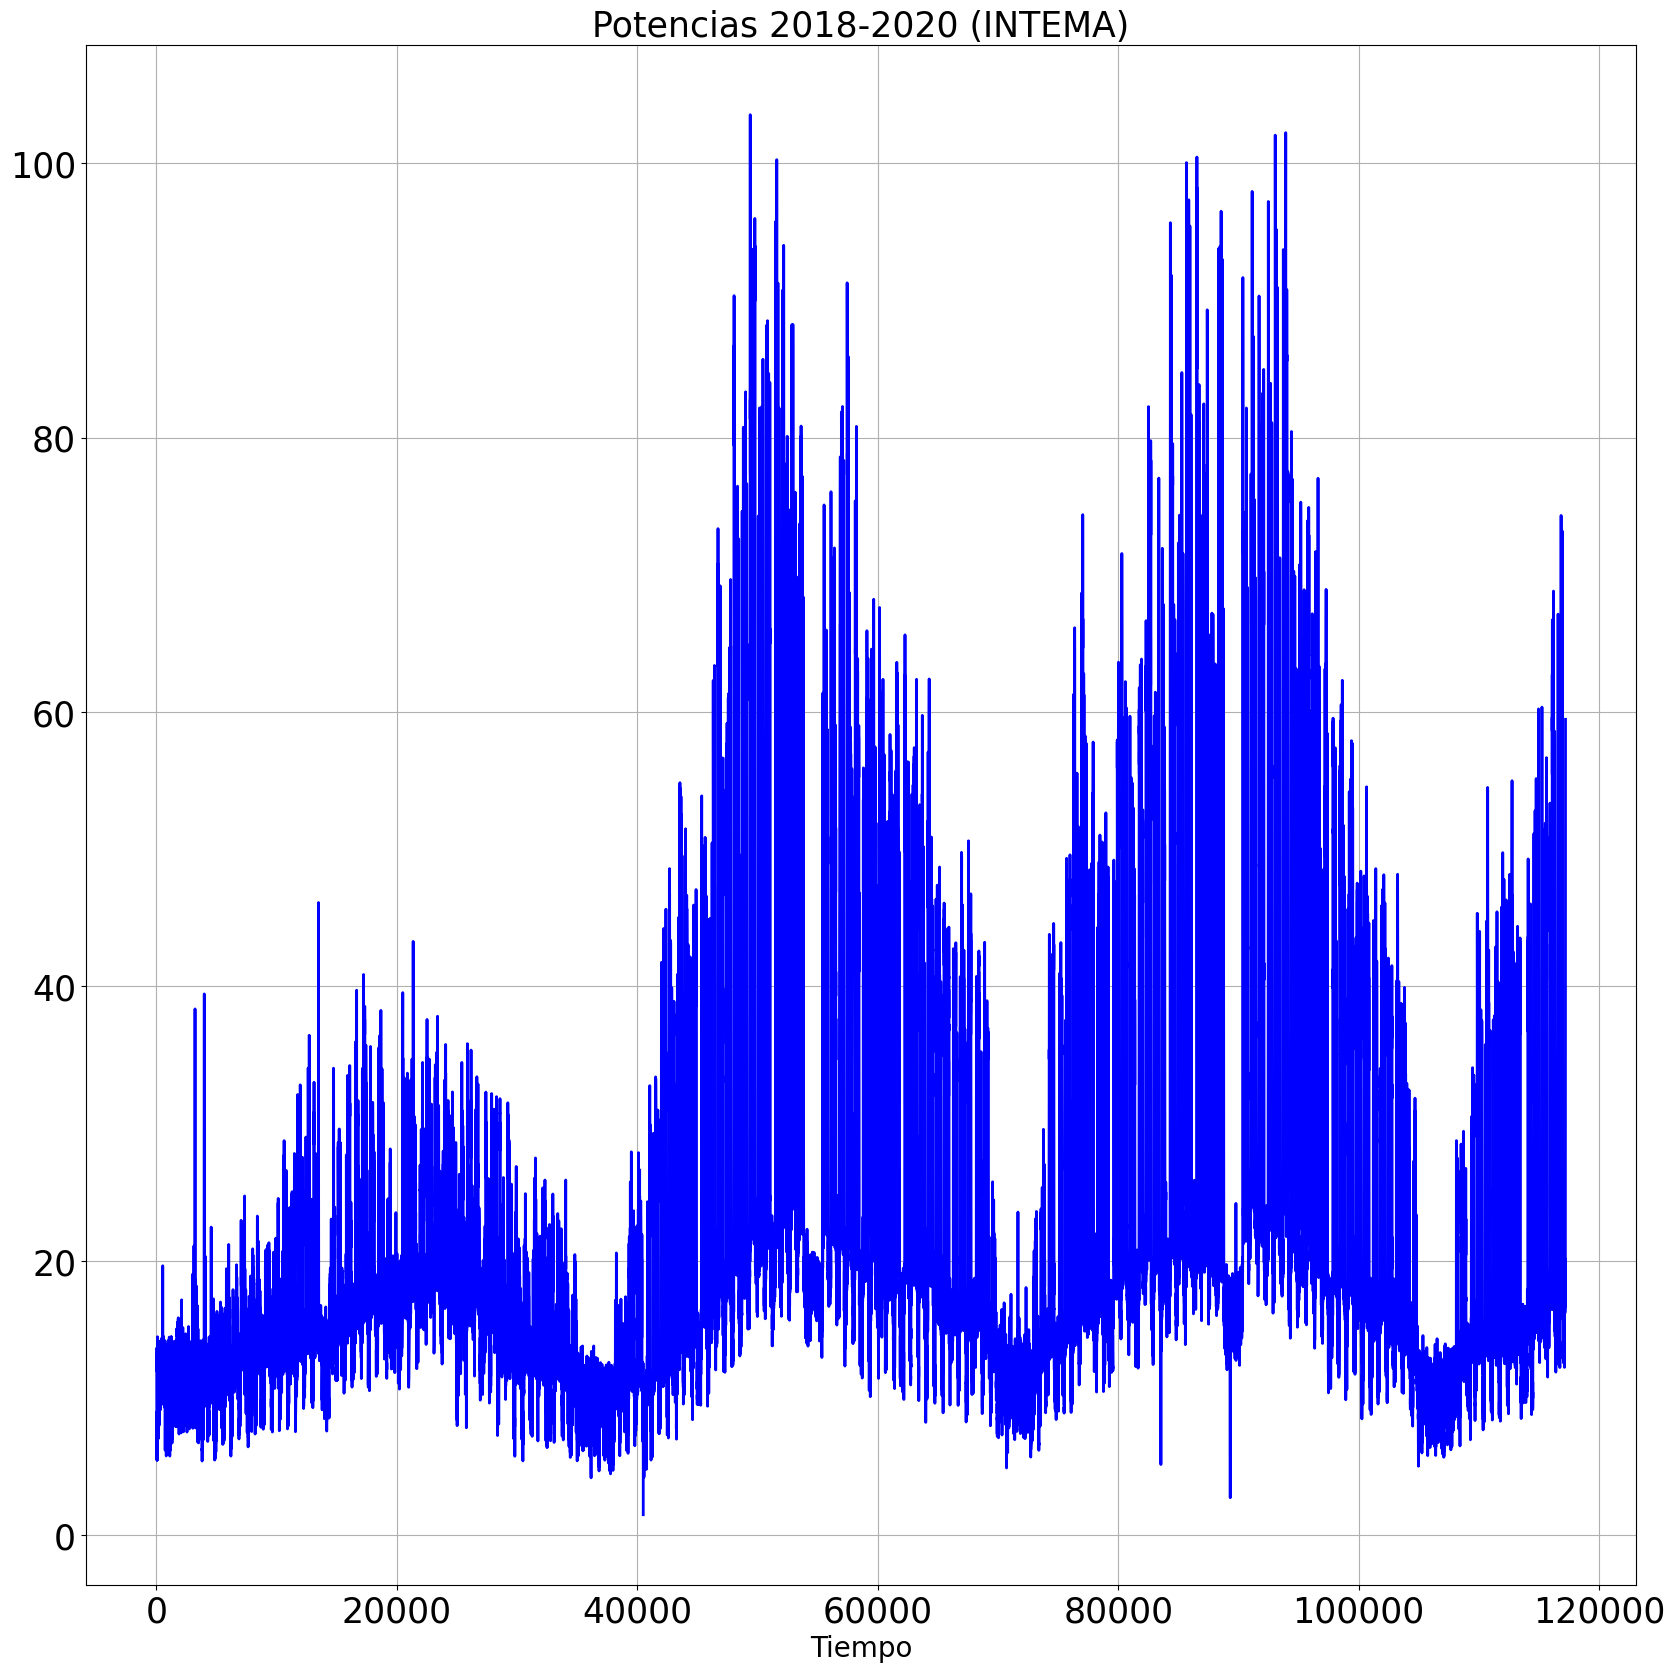

In [78]:
plt.plot(final_df["activa"],'b', linewidth = 2)
plt.rcParams['figure.figsize'] = [20, 20]

plt.grid(True)
plt.title("Potencias 2018-2020 (INTEMA)", fontsize = 25)
plt.xlabel("Tiempo", fontsize = 20)
#plt.ylabel("P [kW]", fontsize = 20)
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 
plt.show

In [189]:
final_df_copy = final_df.copy()

In [190]:
# Función para crear ventanas deslizantes
def create_windows(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i+ window_size])  # Indexar correctamente para un array unidimensional
    return np.array(X), np.array(y)

# Crear las ventanas deslizantes
mediciones_ventana = 4


activapre, activapost = create_windows(final_df_copy['activa'], mediciones_ventana)
aparentepre, aparentepost = create_windows(final_df_copy['aparente'], mediciones_ventana)
reactivapre, reactivapost = create_windows(final_df_copy['reactiva'], mediciones_ventana)
mespre, mespost = create_windows(final_df_copy['mes'], mediciones_ventana)
diapre, diapost = create_windows(final_df_copy['dia'], mediciones_ventana)
minutopre, minutopost = create_windows(final_df_copy['minuto'], mediciones_ventana)
i1pre, i1post = create_windows(final_df_copy['l1'], mediciones_ventana)
i2pre, i2post = create_windows(final_df_copy['l2'], mediciones_ventana)
i3pre, i3post = create_windows(final_df_copy['l3'], mediciones_ventana)

#print(activapre)
print(activapost)

[12.54  13.308 12.18  ... 51.996 53.472 59.472]


In [185]:

# Ejemplo de datos y tamaño de ventana
data = np.arange(10)  # Array de ejemplo con datos de 0 a 99
print(data)
window_size = 3

# Lista para almacenar las ventanas
g = []
f= []
for i in range(len(data) - window_size):
    f.append(data[i:i + window_size])
    g.append(data[i + window_size])

# Convertir a un array de numpy si es necesario
g = np.array(g)
f = np.array(f)

print("g")
print(g[0:10])
print("faaa")
print(f[0:10])
g.shape
f.shape

[0 1 2 3 4 5 6 7 8 9]
g
[3 4 5 6 7 8 9]
faaa
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]]


(7, 3)

In [191]:
print(activapre)

[[13.584 12.492 12.468 13.032]
 [12.492 12.468 13.032 12.54 ]
 [12.468 13.032 12.54  13.308]
 ...
 [38.568 44.292 45.84  52.092]
 [44.292 45.84  52.092 51.996]
 [45.84  52.092 51.996 53.472]]


In [192]:
#Armamos los datos con el formato que queremos
X = np.concatenate([activapre, aparentepre, reactivapre, mespre, diapre, minutopre, i1pre, i2pre, i3pre], axis=1)
y = activapost  # Supongamos que queremos predecir la 'activa' post ventana

archivo_salida = 'datos.txt'

nombre_columna = 'X'

# Abre el archivo de texto para escritura
with open(archivo_salida, 'w') as f:
    # Itera sobre las filas del array X
    for fila in X:
        # Convierte cada fila a una cadena de texto con valores separados por comas
        fila_str = ','.join(map(str, fila))
        # Escribe la fila en el archivo y añade una nueva línea
        f.write(f"{fila_str}\n")


In [193]:
# Proporciones para cada conjunto
train_size = 0.7
val_size = 0.15
test_size = 0.15

# Divide los datos en entrenamiento y temporal (validación + prueba)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(1 - train_size), random_state=4)

# Calcula la proporción de validación y prueba en el conjunto temporal
val_size_temp = val_size / (val_size + test_size)

# Divide el conjunto temporal en validación y prueba
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(1 - val_size_temp), random_state=45)

# Verifica las formas de los conjuntos
print("Forma de X_train:", X_train.shape)
print("Forma de X_val:", X_val.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_val:", y_val.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (82040, 36)
Forma de X_val: (17580, 36)
Forma de X_test: (17581, 36)
Forma de y_train: (82040,)
Forma de y_val: (17580,)
Forma de y_test: (17581,)


In [194]:

scalerX = StandardScaler()
scalery = StandardScaler()

# Assuming y is a 1D array, reshape it to 2D
y_reshaped = y.reshape(-1, 1)

# Fit and transform X and y_scaled
X_train = scalerX.fit_transform(X_train)
X_val = scalerX.fit_transform(X_val)
X_test = scalerX.fit_transform(X_test)


y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

y_train = scalery.fit_transform(y_train)
y_val = scalery.fit_transform(y_val)
y_test = scalery.fit_transform(y_test)


In [195]:
promedio = np.nanmean(y_train)
# Reemplazar NaN por el promedio calculado
y_train[np.isnan(y_train)] = promedio

promedio = np.nanmean(X_train)
# Reemplazar NaN por el promedio calculado
X_train[np.isnan(X_train)] = promedio

promedio = np.nanmean(X_val)
# Reemplazar NaN por el promedio calculado
X_val[np.isnan(X_val)] = promedio

promedio = np.nanmean(y_val)
# Reemplazar NaN por el promedio calculado
y_val[np.isnan(y_val)] = promedio

promedio = np.nanmean(X_test)
# Reemplazar NaN por el promedio calculado
X_test[np.isnan(X_test)] = promedio

promedio = np.nanmean(y_test)
# Reemplazar NaN por el promedio calculado
y_test[np.isnan(y_test)] = promedio


In [10]:
copia_datos = X
copia_datos
copia_datos2 = copia_datos
print(copia_datos)

[[13.584 12.492 12.468 ... 20.34  20.64  20.7  ]
 [12.492 12.468 13.032 ... 20.64  20.7   20.1  ]
 [12.468 13.032 12.54  ... 20.7   20.1   20.52 ]
 ...
 [38.568 44.292 45.84  ... 59.22  62.1   80.79 ]
 [44.292 45.84  52.092 ... 62.1   80.79  73.89 ]
 [45.84  52.092 51.996 ... 80.79  73.89  71.88 ]]


In [11]:
datos_escalados = scalerX.fit_transform(copia_datos2)
print(datos_escalados)

[[-0.55772583 -0.63958184 -0.64139224 ... -0.72535979 -0.70899551
  -0.70573259]
 [-0.63957116 -0.6413806  -0.5991223  ... -0.70898359 -0.70572033
  -0.73848385]
 [-0.64136996 -0.59910976 -0.63599608 ... -0.70570835 -0.73847214
  -0.71555797]
 ...
 [ 1.31482338  1.74377416  1.85972936 ...  1.39699603  1.55415409
   2.57430652]
 [ 1.74383681  1.85979413  2.32829619 ...  1.55420757  2.57437276
   2.19766698]
 [ 1.85985931  2.32837092  2.3211013  ...  2.57444498  2.19772702
   2.08795025]]


In [135]:
datos_desescalados = scalerX.inverse_transform(datos_escalados)
print(datos_desescalados)

[[13.584 12.492 12.468 ... 20.34  20.64  20.7  ]
 [12.492 12.468 13.032 ... 20.64  20.7   20.1  ]
 [12.468 13.032 12.54  ... 20.7   20.1   20.52 ]
 ...
 [38.568 44.292 45.84  ... 59.22  62.1   80.79 ]
 [44.292 45.84  52.092 ... 62.1   80.79  73.89 ]
 [45.84  52.092 51.996 ... 80.79  73.89  71.88 ]]


In [248]:
model = Sequential()
model.add(Dense(600, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(420, activation='relu'))
model.add(Dense(22, activation='relu'))
model.add(Dense(1, activation='linear')) # Suponiendo que estás prediciendo un valor continuo

# Definir el optimizador con el learning rate deseado
optimizer = Adam(learning_rate=0.001)

# Compilar el modelo especificando el optimizador y otras configuraciones
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
#model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

model.summary()


#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#history = model.fit(X_train, y_train, epochs=2, validation_data=(X_val, y_val), callbacks=[early_stopping],  verbose=1)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=1)


# Gráfica de la pérdida
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
#plt.axvline(x=len(history.history['loss']) - early_stopping.patience, color='r', linestyle='--', label='Early Stopping')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Gráfica del MAE
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
#plt.axvline(x=len(history.history['mae']) - early_stopping.patience, color='r', linestyle='--', label='Early Stopping')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 600)               22200     
                                                                 
 dense_13 (Dense)            (None, 420)               252420    
                                                                 
 dense_14 (Dense)            (None, 22)                9262      
                                                                 
 dense_15 (Dense)            (None, 1)                 23        
                                                                 
Total params: 283905 (1.08 MB)
Trainable params: 283905 (1.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/60
2513/2564 [============================>.] - ETA: 0s - loss: 0.0186 - mae: 0.0850

KeyboardInterrupt: 

In [197]:
print(y_test)

[[-0.60488621]
 [-0.76995699]
 [-0.37646395]
 ...
 [ 0.27757323]
 [ 1.97824836]
 [-0.24440733]]


In [198]:
y_test = scalery.inverse_transform(y_test)


1/1 [==============================] - 0s 65ms/step
[[1.5665895]]
[[42.175694]]
en test esa pos tenia
[44.796]


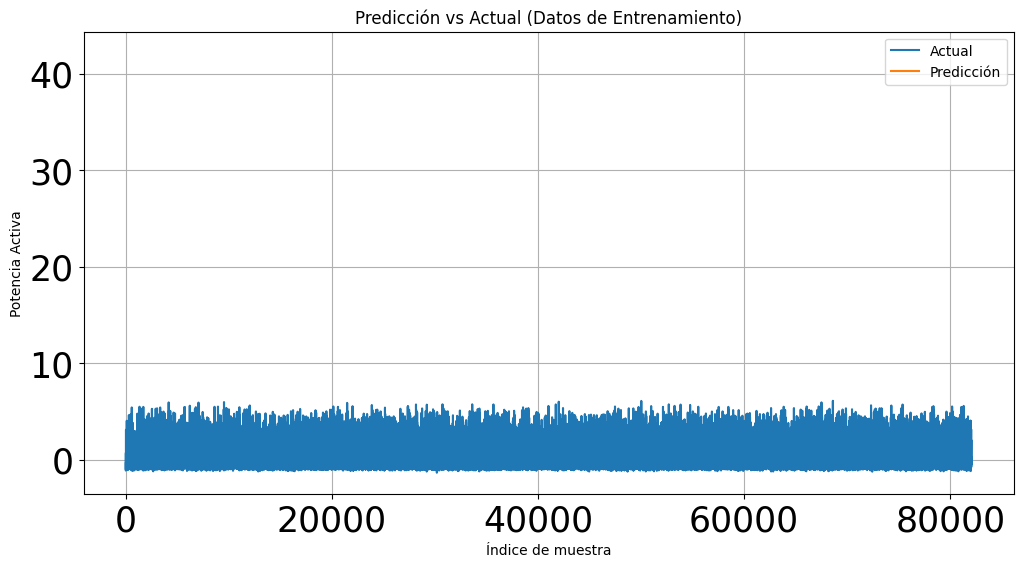

In [199]:
y_test_pred = model.predict(X_test[156,:].reshape(1, -1))
print(y_test_pred)

y_test_pred = scalery.inverse_transform(y_test_pred)
print(y_test_pred)

#a = scalery.inverse_transform([-0.07620964])
print("en test esa pos tenia")
print(y_test[156])


plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Actual')
plt.plot(y_test_pred, label='Predicción')
plt.xlabel('Índice de muestra')
plt.ylabel('Potencia Activa')
plt.title('Predicción vs Actual (Datos de Entrenamiento)')
plt.legend()
plt.grid(True)
plt.show()

In [200]:
y_test = y_test.reshape(-1, 1)


In [201]:
y_test_pred = y_test_pred.reshape(-1, 1)


print(y_test_pred.shape)
print("este es y test", y_test.shape)

(1, 1)
este es y test (17581, 1)


In [202]:
import numpy as np 
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Supongamos que model es tu modelo ya entrenado y X_test, y_test son tus datos de prueba
# Hacemos predicciones
y_test_pred = model.predict(X_test)




has_nan = np.isnan(y_test_pred).any()
print("¿Hay NaN en los datos y_test_pred?", has_nan)
nan_positions = np.argwhere(np.isnan(y_test_pred))
print("Posiciones de NaN en los datos X:")
print(nan_positions)

y_test_pred[np.isnan(y_test_pred)] = promedio

y_test_pred = scalery.inverse_transform(y_test_pred)





has_nan = np.isnan(y_test).any()
print("¿Hay NaN en los datos y_Test?", has_nan)
nan_positions = np.argwhere(np.isnan(y_test))
print("Posiciones de NaN en los datos X:")
print(nan_positions)

y_test[np.isnan(y_test)] = promedio


# Calculamos el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_test_pred)



# Calculamos otras métricas de error
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Imprimimos las métricas de error
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

# Definimos un margen de error aceptable (por ejemplo, 10 unidades) 12.45
margin_of_error = 4

# Calculamos cuántas predicciones están dentro del margen de error
within_margin = np.sum(np.abs(y_test - y_test_pred) <= margin_of_error)
total_predictions = len(y_test)
accuracy_within_margin = within_margin / total_predictions

# Imprimimos la precisión dentro del margen de error
print(f'Número de predicciones dentro del margen de error: {within_margin}')
print(f'Precisión dentro del margen de error: {accuracy_within_margin:.2%}')



550/550 [==============================] - 1s 2ms/step
¿Hay NaN en los datos y_test_pred? False
Posiciones de NaN en los datos X:
[]
¿Hay NaN en los datos y_Test? False
Posiciones de NaN en los datos X:
[]
MSE: 2.1631893992343016
MAE: 0.9466963591925228
RMSE: 1.470778501078358
R²: 0.9880400604985432
Número de predicciones dentro del margen de error: 17091
Precisión dentro del margen de error: 97.21%


In [203]:
print(y_test)

[[12.972]
 [10.752]
 [16.044]
 ...
 [24.84 ]
 [47.712]
 [17.82 ]]


In [145]:
archivo_salida = "datos_estimados.txt"
# Abre el archivo de texto para escritura
with open(archivo_salida, 'w') as f:
    # Itera sobre los valores de y_train
    for x_test in y_test_pred:
        # Escribe el valor de y_train en el archivo y añade una nueva línea
        f.write(f"{x_test}\n")

In [146]:
archivo_salida = "datos_en_y_test.txt"
# Abre el archivo de texto para escritura
with open(archivo_salida, 'w') as f:
    # Itera sobre los valores de y_train
    for x_test in y_test:
        # Escribe el valor de y_train en el archivo y añade una nueva línea
        f.write(f"{x_test}\n")

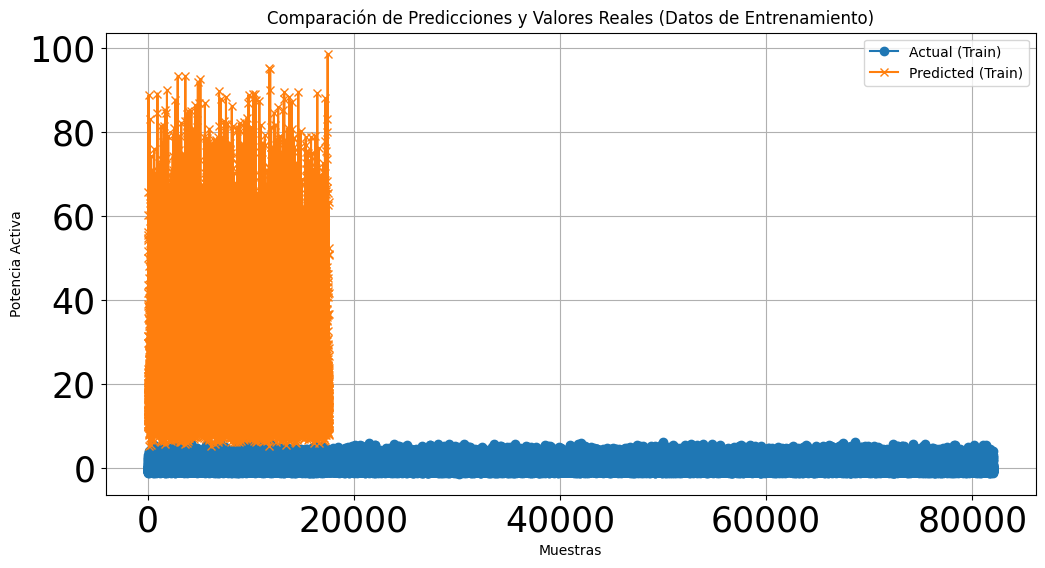

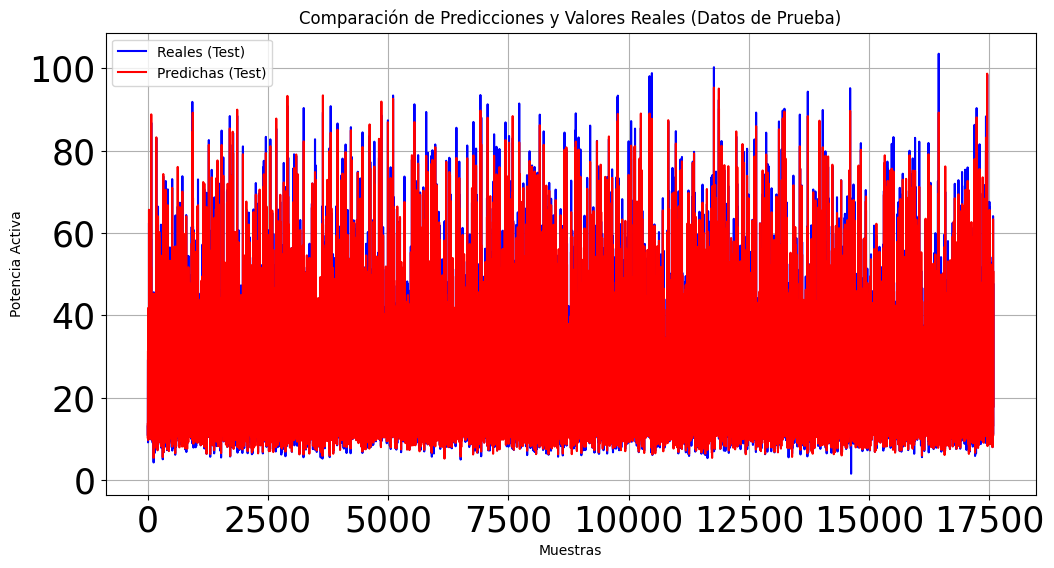

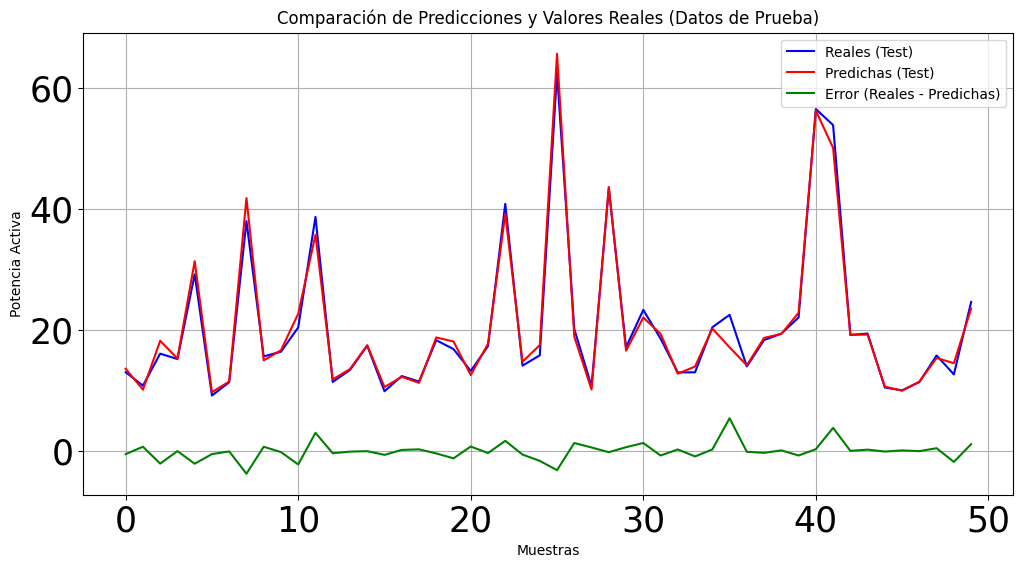

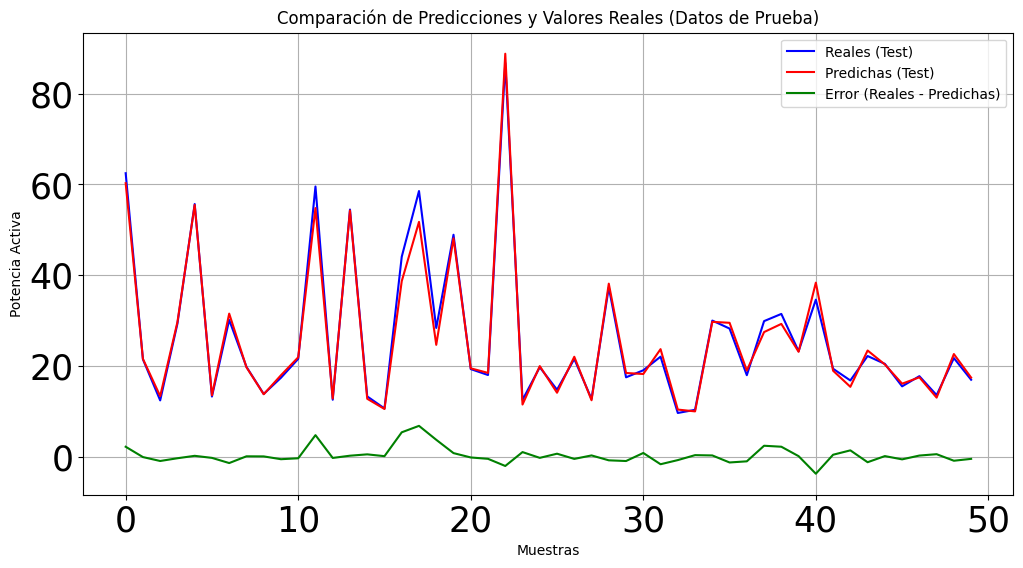

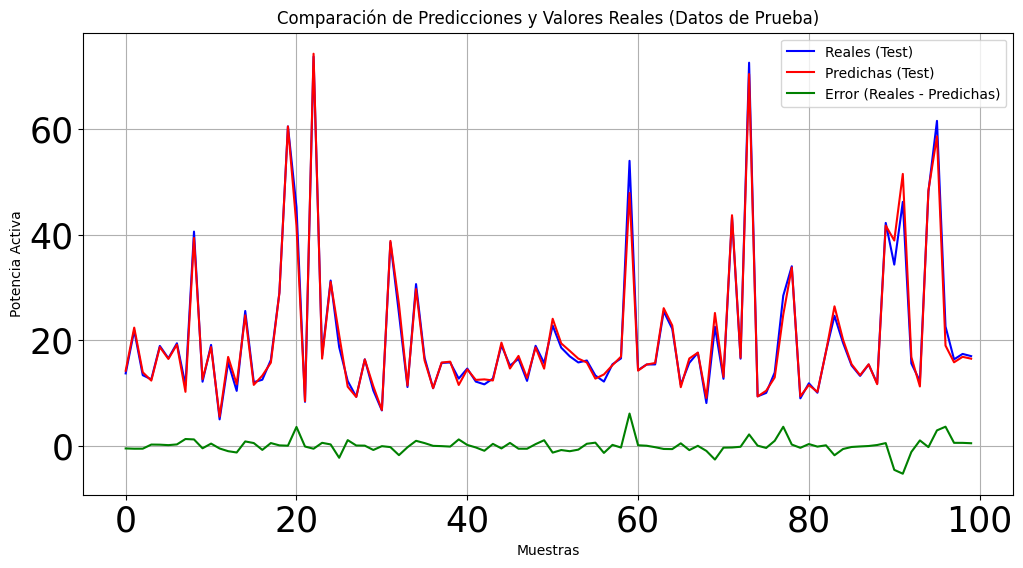

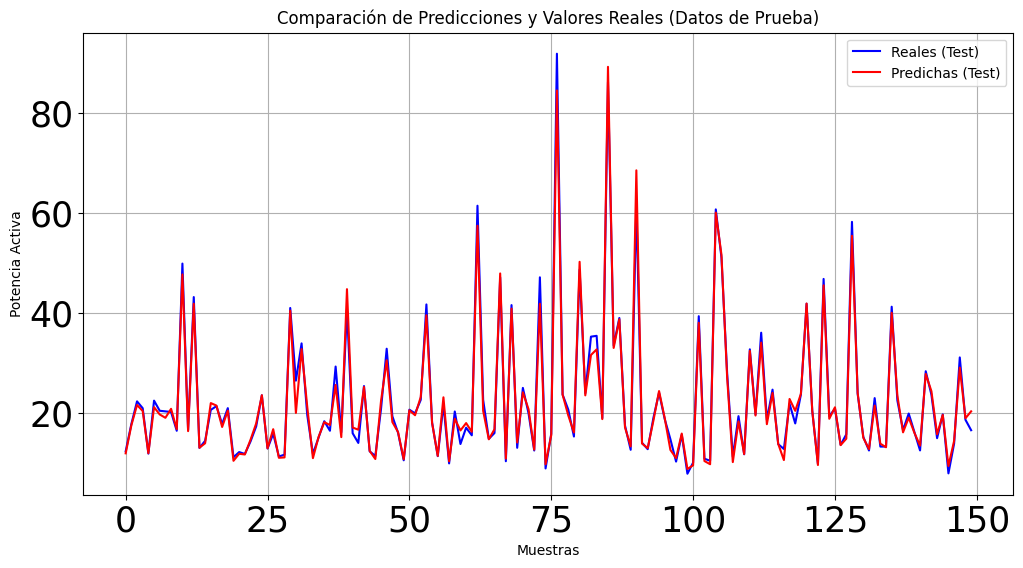

[[-0.56384194]
 [ 0.65578761]
 [-2.13312593]
 ...
 [-1.8022596 ]
 [-3.00865735]
 [-0.04559296]]


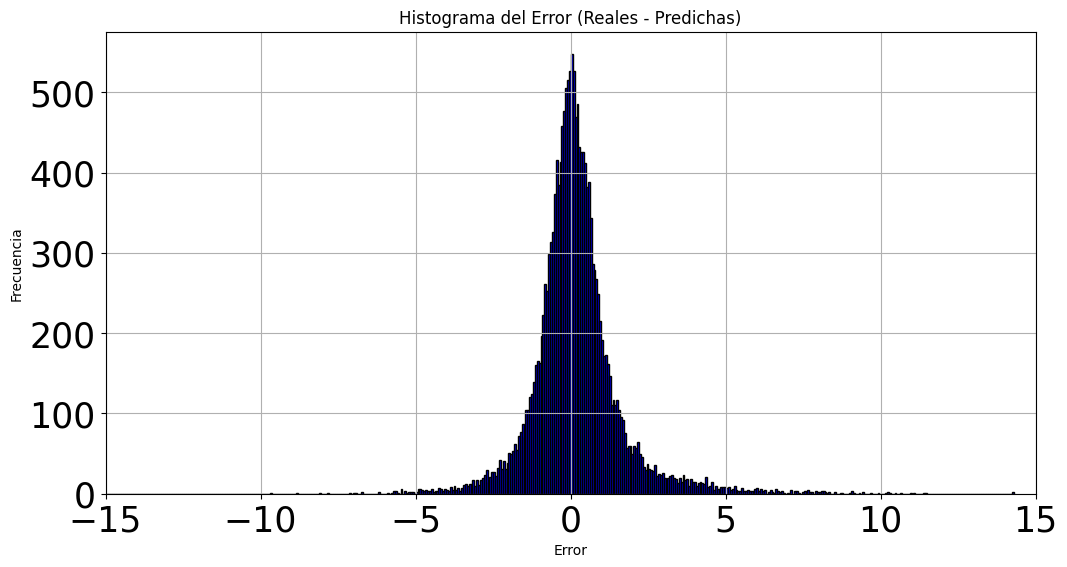

In [204]:

# Plot de datos de entrenamiento
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Actual (Train)', marker='o')
plt.plot(y_test_pred, label='Predicted (Train)', marker='x')
plt.title('Comparación de Predicciones y Valores Reales (Datos de Entrenamiento)')
plt.xlabel('Muestras')
plt.ylabel('Potencia Activa')
plt.legend()
plt.grid(True)
plt.show()

# Plot de datos de prueba
plt.figure(figsize=(12, 6))

# Ploteamos los datos reales y predichos como líneas
plt.plot(y_test, label='Reales (Test)', linestyle='-', color='blue')
plt.plot(y_test_pred, label='Predichas (Test)', linestyle='-', color='red')

# Añadimos título y etiquetas
plt.title('Comparación de Predicciones y Valores Reales (Datos de Prueba)')
plt.xlabel('Muestras')
plt.ylabel('Potencia Activa')

# Añadimos la leyenda y la cuadrícula
plt.legend()
plt.grid(True)

# Mostramos el gráfico
plt.show()



# Calculamos el error (diferencia entre los valores reales y predichos)
error = y_test[:50] - y_test_pred[:50]

# Plot de datos de prueba
plt.figure(figsize=(12, 6))

# Ploteamos los primeros 50 datos reales y predichos como líneas
plt.plot(y_test[:50], label='Reales (Test)', linestyle='-', color='blue')
plt.plot(y_test_pred[:50], label='Predichas (Test)', linestyle='-', color='red')

# Ploteamos el error como línea
plt.plot(error, label='Error (Reales - Predichas)', linestyle='-', color='green')

# Añadimos título y etiquetas
plt.title('Comparación de Predicciones y Valores Reales (Datos de Prueba)')
plt.xlabel('Muestras')
plt.ylabel('Potencia Activa')

# Añadimos la leyenda y la cuadrícula
plt.legend()
plt.grid(True)

# Mostramos el gráfico
plt.show()






# Plot de datos de prueba
plt.figure(figsize=(12, 6))

error = y_test[50:100] - y_test_pred[50:100]

# Ploteamos los primeros 100 datos reales y predichos como líneas
plt.plot(y_test[50:100], label='Reales (Test)', linestyle='-', color='blue')
plt.plot(y_test_pred[50:100], label='Predichas (Test)', linestyle='-', color='red')
plt.plot(error, label='Error (Reales - Predichas)', linestyle='-', color='green')

# Añadimos título y etiquetas
plt.title('Comparación de Predicciones y Valores Reales (Datos de Prueba)')
plt.xlabel('Muestras')
plt.ylabel('Potencia Activa')

# Añadimos la leyenda y la cuadrícula
plt.legend()
plt.grid(True)

# Mostramos el gráfico
plt.show()


# Plot de datos de prueba
plt.figure(figsize=(12, 6))
error = y_test[300:400] - y_test_pred[300:400]

# Ploteamos los primeros 100 datos reales y predichos como líneas
plt.plot(y_test[300:400], label='Reales (Test)', linestyle='-', color='blue')
plt.plot(y_test_pred[300:400], label='Predichas (Test)', linestyle='-', color='red')
plt.plot(error, label='Error (Reales - Predichas)', linestyle='-', color='green')

# Añadimos título y etiquetas
plt.title('Comparación de Predicciones y Valores Reales (Datos de Prueba)')
plt.xlabel('Muestras')
plt.ylabel('Potencia Activa')

# Añadimos la leyenda y la cuadrícula
plt.legend()
plt.grid(True)

# Mostramos el gráfico
plt.show()





# Plot de datos de prueba
plt.figure(figsize=(12, 6))

# Ploteamos los primeros 100 datos reales y predichos como líneas
plt.plot(y_test[850:1000], label='Reales (Test)', linestyle='-', color='blue')
plt.plot(y_test_pred[850:1000], label='Predichas (Test)', linestyle='-', color='red')

# Añadimos título y etiquetas
plt.title('Comparación de Predicciones y Valores Reales (Datos de Prueba)')
plt.xlabel('Muestras')
plt.ylabel('Potencia Activa')

# Añadimos la leyenda y la cuadrícula
plt.legend()
plt.grid(True)

# Mostramos el gráfico
plt.show()


error = y_test - y_test_pred
print((error))


# Creamos un histograma del error
plt.figure(figsize=(12, 6))
plt.xlim(-15, 15)

plt.hist(error, bins=500, edgecolor='black', color='blue')

# Añadimos título y etiquetas
plt.title('Histograma del Error (Reales - Predichas)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')

# Mostramos el gráfico
plt.grid(True)
plt.show()

In [205]:
std_deviation = np.std(error)

print(f"Desviación estándar del error: {std_deviation:.2f}")

Desviación estándar del error: 1.46


In [206]:
min_error = np.min(error)
max_error = np.max(error)


# Encontrar los índices de los valores que tienen un valor absoluto mayor que 1
indices = np.where(np.abs(error) > 0.7)
# Contar cuántos valores cumplen la condición
cont = len(indices[0])

with open("resultados.txt", "w") as file:
    file.write(f"Valor minimo del error: {min_error}\n")
    file.write(f"Valor maximo del error: {max_error}\n")
    file.write(f"Cantidad de valores con modulo mayor que el elegido: {cont}\n")

    file.write("Posiciones y valores:\n")
    for i in range(cont):
        row = indices[0][i]
        col = indices[1][i]
        file.write(f"indice: ({row}, {col}), Valor: {error[row, col]}\n")

In [207]:
# Leer los CSV a partir de la fila 117207 (recordar que skiprows es 0-based)

# Leer los encabezados del archivo
encabezados_corrientes = pd.read_csv('corrientes.csv', nrows=0).columns
encabezados_potencias = pd.read_csv('potencias.csv', nrows=0).columns

#corrientes_nuevas = pd.read_csv('corrientes_nuevo.csv', skiprows=117206, header=None, names=encabezados_corrientes)
#print(corrientes_nuevas)
#potencias_nuevas = pd.read_csv('potencias_nuevo.csv', skiprows=117206, header=None, names=encabezados_potencias)
corrientes_nuevas = pd.read_csv('corrientes_nuevo.csv', skiprows=117206, header=None, names=encabezados_corrientes)
#print(corrientes_nuevas)
potencias_nuevas = pd.read_csv('potencias_nuevo.csv', skiprows=117206, header=None, names=encabezados_potencias)
print(potencias_nuevas)

# Convertir la columna 'timestamp' a datetime
corrientes_nuevas['timestamp'] = pd.to_datetime(corrientes_nuevas['timestamp'])
potencias_nuevas['timestamp'] = pd.to_datetime(potencias_nuevas['timestamp'])

# Unir los dataframes en base al ID y timestamp
df_unido = pd.merge(corrientes_nuevas, potencias_nuevas, on=['id', 'timestamp'])

# Separar la columna de timestamp en año, mes, día, hora, minuto
df_unido['año'] = df_unido['timestamp'].dt.year
df_unido['mes'] = df_unido['timestamp'].dt.month
df_unido['dia'] = df_unido['timestamp'].dt.day
df_unido['hora'] = df_unido['timestamp'].dt.hour
df_unido['minuto'] = df_unido['timestamp'].dt.minute

# Seleccionar y reorganizar las columnas en el formato deseado
df_nuevo = df_unido[['año', 'mes', 'dia', 'hora', 'minuto', 'activa', 'reactiva', 'aparente', 'l1', 'l2', 'l3']]

# Mostrar el dataframe resultante
print(df_nuevo)

        id  activa  reactiva  aparente            timestamp
0     2103  62.232     1.680    62.256  2024-05-06 10:00:00
1     2103  60.936     2.052    60.972  2024-05-06 10:15:00
2     2103  65.832     2.088    65.864  2024-05-06 10:30:00
3     2103  65.952     2.724    66.008  2024-05-06 10:45:00
4     2103  71.136     2.496    71.180  2024-05-06 11:00:00
...    ...     ...       ...       ...                  ...
4144  2103  72.084     1.476    72.100  2024-06-18 14:00:00
4145  2103  73.680     2.880    73.736  2024-06-18 14:15:00
4146  2103  66.384     1.992    66.412  2024-06-18 14:30:00
4147  2103  59.928     1.956    59.960  2024-06-18 14:45:00
4148  2103  58.584     2.520    58.640  2024-06-18 15:00:00

[4149 rows x 5 columns]
       año  mes  dia  hora  minuto  activa  reactiva  aparente      l1  \
0     2024    5    6    10       0  62.232     1.680    62.256   78.33   
1     2024    5    6    10      15  60.936     2.052    60.972   78.42   
2     2024    5    6    10      3

In [208]:
activaprenueva, activapostnueva = create_windows(df_nuevo['activa'], mediciones_ventana)
aparenteprenueva, aparentepostnueva = create_windows(df_nuevo['aparente'], mediciones_ventana)
reactivaprenueva, reactivapostnueva = create_windows(df_nuevo['reactiva'], mediciones_ventana)
mesprenueva, mespostnueva = create_windows(df_nuevo['mes'], mediciones_ventana)
diaprenueva, diapostnueva = create_windows(df_nuevo['dia'], mediciones_ventana)
minutoprenueva, minutopostnueva = create_windows(df_nuevo['minuto'], mediciones_ventana)
i1prenueva, i1postnueva = create_windows(df_nuevo['l1'], mediciones_ventana)
i2prenueva, i2postnueva = create_windows(df_nuevo['l2'], mediciones_ventana)
i3prenueva, i3postnueva = create_windows(df_nuevo['l3'], mediciones_ventana)

In [209]:
activaprenueva

array([[62.232, 60.936, 65.832, 65.952],
       [60.936, 65.832, 65.952, 71.136],
       [65.832, 65.952, 71.136, 65.208],
       ...,
       [61.068, 68.916, 72.084, 73.68 ],
       [68.916, 72.084, 73.68 , 66.384],
       [72.084, 73.68 , 66.384, 59.928]])

In [210]:
activapostnueva

array([71.136, 65.208, 70.5  , ..., 66.384, 59.928, 58.584])

In [211]:
Xnuevo = np.concatenate([activaprenueva, aparenteprenueva, reactivaprenueva, mesprenueva, diaprenueva, minutoprenueva, i1prenueva, i2prenueva, i3prenueva], axis=1)
ynuevo = activapostnueva  # Supongamos que queremos predecir la 'activa' post ventana
ynuevo
ynuevo.shape

(4145,)

In [212]:
Xnuevo = scalerX.fit_transform(Xnuevo)



In [213]:
Xnuevo

array([[1.77207593, 1.69870029, 1.97280072, ..., 1.62692935, 1.89158841,
        2.12625278],
       [1.69940567, 1.97314347, 1.97952635, ..., 1.89216878, 2.12590328,
        2.51263655],
       [1.97393778, 1.97987002, 2.27007361, ..., 2.12653983, 2.51223707,
        2.13539796],
       ...,
       [1.70680727, 2.14601576, 2.3232061 , ..., 2.11282055, 2.36479015,
        2.42347106],
       [2.1468661 , 2.32359664, 2.41265699, ..., 2.36548397, 2.42308311,
        2.15254517],
       [2.32450453, 2.41305973, 2.00373862, ..., 2.42379092, 2.15219226,
        1.58325784]])

In [214]:
#y_test_prednuevo = model.predict(Xnuevo[0,:].reshape(1, -1))
y_test_prednuevo = model.predict(Xnuevo)
y_test_prednuevo = scalery.inverse_transform(y_test_prednuevo)
#y_test_prednuevo = y_test_prednuevo + 20


130/130 [==============================] - 0s 2ms/step


In [229]:
ynuevo

array([71.136, 65.208, 70.5  , ..., 66.384, 59.928, 58.584])

In [215]:
y_test_prednuevo

array([[46.524536],
       [50.265675],
       [45.824406],
       ...,
       [52.824547],
       [47.710323],
       [42.79765 ]], dtype=float32)

In [237]:
ynuevo = ynuevo.reshape(-1, 1)


In [239]:
mse = mean_squared_error(ynuevo, y_test_prednuevo)



# Calculamos otras métricas de error
mae = mean_absolute_error(ynuevo, y_test_prednuevo)
rmse = np.sqrt(mse)
r2 = r2_score(ynuevo, y_test_prednuevo)

# Imprimimos las métricas de error
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

# Definimos un margen de error aceptable (por ejemplo, 10 unidades) 12.45
margin_of_error = 4

# Calculamos cuántas predicciones están dentro del margen de error
within_margin = np.sum(np.abs(ynuevo - y_test_prednuevo) <= margin_of_error)
total_predictions = len(ynuevo)
accuracy_within_margin = within_margin / total_predictions

# Imprimimos la precisión dentro del margen de error
print(f'Número de predicciones dentro del margen de error: {within_margin}')
print(f'Precisión dentro del margen de error: {accuracy_within_margin:.2%}')

MSE: 119.51938559048898
MAE: 9.827556409926466
RMSE: 10.9324921948515
R²: 0.6243176454224675
Número de predicciones dentro del margen de error: 10
Precisión dentro del margen de error: 0.24%


In [218]:
ynuevo.shape

(4145,)

In [220]:
ynuevo.shape

(4145,)

In [227]:
ynuevo
ynuevo.shape
y_test_prednuevo.shape

(4145, 1)

In [224]:
error = ynuevo[4045:4145] - y_test_prednuevo[4045:4145]
print(error)
error.shape

[[  7.41149425   8.21549425   8.73149425 ...  60.70349425  54.24749425
   52.90349425]
 [  6.92141437   7.72541437   8.24141437 ...  60.21341437  53.75741437
   52.41341437]
 [  6.79325961   7.59725961   8.11325961 ...  60.08525961  53.62925961
   52.28525961]
 ...
 [-39.73254681 -38.92854681 -38.41254681 ...  13.55945319   7.10345319
    5.75945319]
 [-34.61832333 -33.81432333 -33.29832333 ...  18.67367667  12.21767667
   10.87367667]
 [-29.70564938 -28.90164938 -28.38564938 ...  23.58635062  17.13035062
   15.78635062]]


(100, 100)

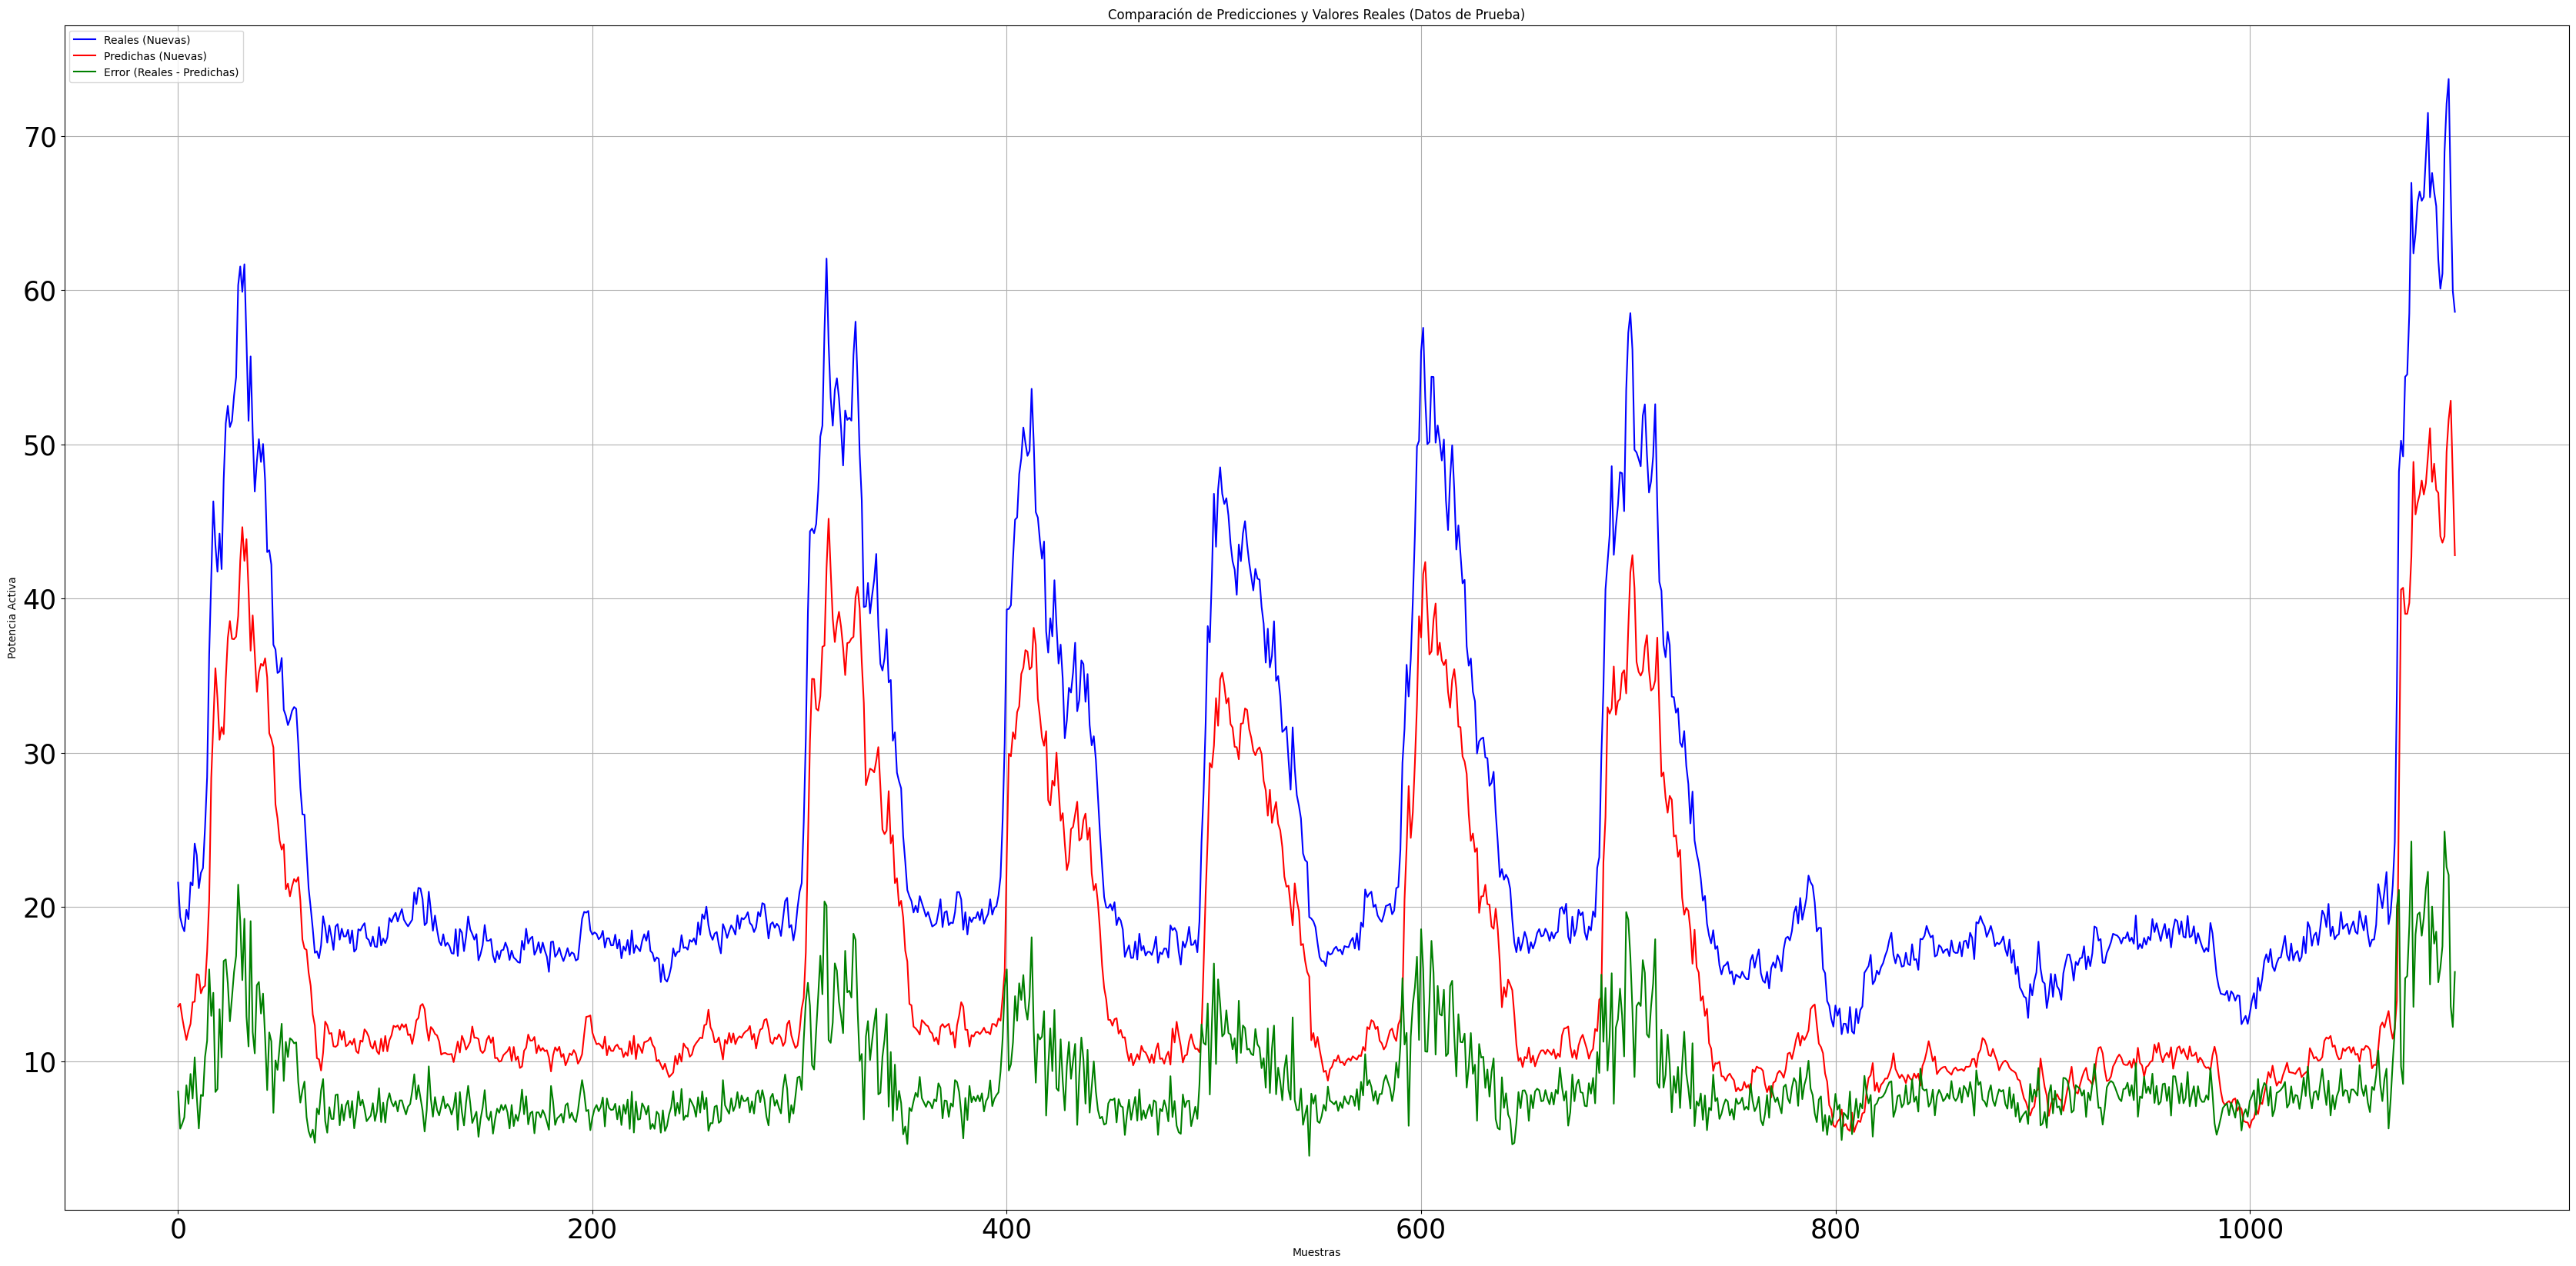

In [241]:
# Plot de datos de prueba 117207 121351 datos nuevos aprox 4000 ultimos
plt.figure(figsize=(42, 20))
error = ynuevo[3045:4145] - y_test_prednuevo[3045:4145]

# Ploteamos los primeros 100 datos reales y predichos como líneas
plt.plot(ynuevo[3045:4145], label='Reales (Nuevas)', linestyle='-', color='blue')
plt.plot(y_test_prednuevo[3045:4145], label='Predichas (Nuevas)', linestyle='-', color='red')
plt.plot(error, label='Error (Reales - Predichas)', linestyle='-', color='green')

# Añadimos título y etiquetas
plt.title('Comparación de Predicciones y Valores Reales (Datos de Prueba)')
plt.xlabel('Muestras')
plt.ylabel('Potencia Activa')

# Añadimos la leyenda y la cuadrícula
plt.legend()
plt.grid(True)

# Mostramos el gráfico
plt.show()


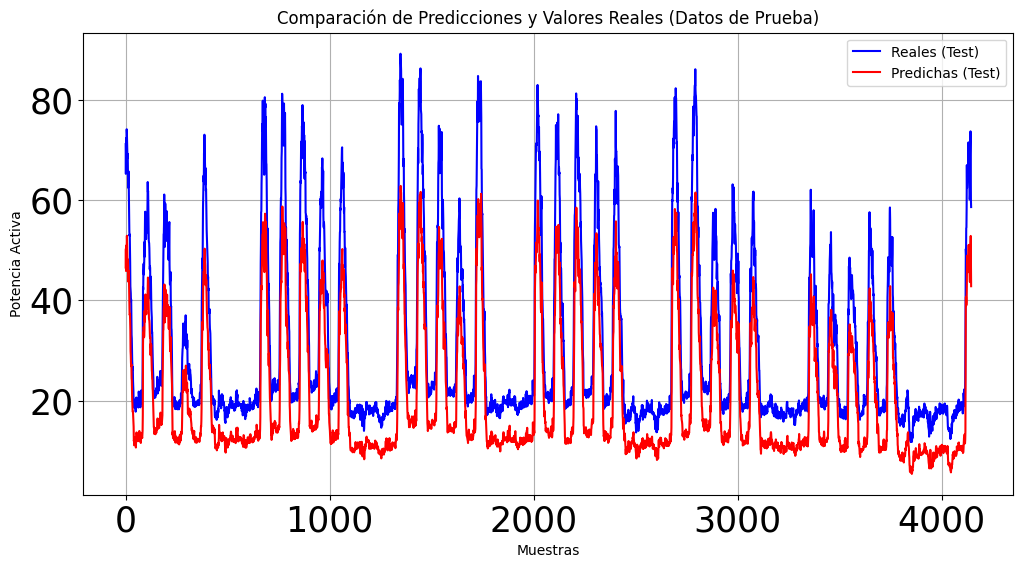

In [243]:
# Plot de datos de prueba
plt.figure(figsize=(12, 6))
error = ynuevo - y_test_prednuevo

# Ploteamos los primeros 100 datos reales y predichos como líneas
plt.plot(ynuevo, label='Reales (Test)', linestyle='-', color='blue')
plt.plot(y_test_prednuevo, label='Predichas (Test)', linestyle='-', color='red')
#plt.plot(error, label='Error (Reales - Predichas)', linestyle='-', color='green')

# Añadimos título y etiquetas
plt.title('Comparación de Predicciones y Valores Reales (Datos de Prueba)')
plt.xlabel('Muestras')
plt.ylabel('Potencia Activa')

# Añadimos la leyenda y la cuadrícula
plt.legend()
plt.grid(True)

# Mostramos el gráfico
plt.show()

In [244]:
min_error = np.min(error)
max_error = np.max(error)


# Encontrar los índices de los valores que tienen un valor absoluto mayor que 1
indices = np.where(np.abs(error) > 1)
# Contar cuántos valores cumplen la condición
cont = len(indices[0])

with open("resultados_nuevos.txt", "w") as file:
    file.write(f"Valor minimo del error: {min_error}\n")
    file.write(f"Valor maximo del error: {max_error}\n")
    file.write(f"Cantidad de valores con modulo mayor que el elegido: {cont}\n")

    file.write("Posiciones y valores:\n")
    for i in range(cont):
        row = indices[0][i]
        col = indices[1][i]
        file.write(f"indice: ({row}, {col}), Valor: {error[row, col]}\n")

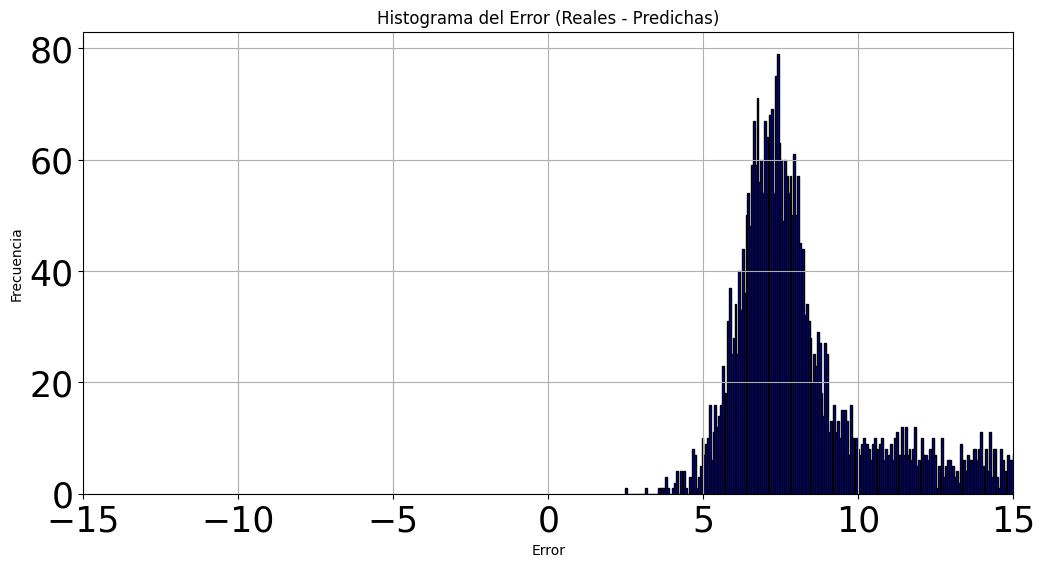

Desviación estándar del error: 4.79
med del error: 9.83


In [247]:
# Creamos un histograma del error
plt.figure(figsize=(12, 6))
plt.xlim(-15, 15)

plt.hist(error, bins=500, edgecolor='black', color='blue')

# Añadimos título y etiquetas
plt.title('Histograma del Error (Reales - Predichas)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')

# Mostramos el gráfico
plt.grid(True)
plt.show()

std_deviation = np.std(error)
med = np.mean(error)
print(f"Desviación estándar del error: {std_deviation:.2f}")
print(f"med del error: {med:.2f}")